In [2]:
import numpy as np
import pandas as pd
import keras
from IPython.display import display
import PIL
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib
# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split
# GridSearchCV : 최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# confusion matrix
from sklearn.metrics import confusion_matrix
# DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
# export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz
# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

In [4]:
import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [5]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

In [7]:
df_raw = pd.read_csv("dataset/credit_train_puri.csv")

In [8]:
df_raw

,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
0,0,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.901321,6,1,228190,416746.0,1.0,0.0
1,0,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18,1,297996,750090.0,0.0,0.0
2,0,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.901321,9,0,256329,386958.0,0.0,0.0
3,1,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,34.901321,6,0,215308,272448.0,0.0,0.0
4,0,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.000000,13,1,122170,272052.0,1.0,0.0
5,0,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.000000,4,0,437171,555038.0,0.0,0.0
6,0,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,34.901321,20,0,669560,1021460.0,0.0,0.0
7,0,99999999,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.000000,16,0,203965,289784.0,0.0,0.0
8,0,99999999,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.000000,6,0,134083,220220.0,0.0,0.0
9,0,99999999,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,34.901321,10,1,225549,496474.0,1.0,0.0


In [9]:
df_raw.isnull().sum(axis=0)

대출 상태             0
현재 대출 총액          0
기간                0
신용점수              0
연소득               0
현직업 근속연수          0
거주지 소유 여부         0
대출 목적             0
월별 부채             0
신용 연도             0
마지막 연체 이후 개월 수    0
보유 계좌 개수          0
신용문제 발생 횟수        0
현재 신용 잔고          0
최대 신용 잔고          0
파산 횟수             0
재산차압권             0
dtype: int64

In [10]:
df_raw_dummy = pd.get_dummies(df_raw)

In [11]:
df_raw_dummy

,대출 상태,현재 대출 총액,신용점수,연소득,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,...,대출 목적_Medical Bills,대출 목적_Other,대출 목적_Take a Trip,대출 목적_major_purchase,대출 목적_moving,대출 목적_other,대출 목적_renewable_energy,대출 목적_small_business,대출 목적_vacation,대출 목적_wedding
0,0,445412,709.0,1167493.0,5214.74,17.2,34.901321,6,1,228190,...,0,0,0,0,0,0,0,0,0,0
1,0,99999999,741.0,2231892.0,29200.53,14.9,29.000000,18,1,297996,...,0,0,0,0,0,0,0,0,0,0
2,0,347666,721.0,806949.0,8741.90,12.0,34.901321,9,0,256329,...,0,0,0,0,0,0,0,0,0,0
3,1,206602,7290.0,896857.0,16367.74,17.3,34.901321,6,0,215308,...,0,0,0,0,0,0,0,0,0,0
4,0,217646,730.0,1184194.0,10855.08,19.6,10.000000,13,1,122170,...,0,0,0,0,0,0,0,0,0,0
5,0,548746,678.0,2559110.0,18660.28,22.6,33.000000,4,0,437171,...,0,0,0,0,0,0,0,0,0,0
6,0,215952,739.0,1454735.0,39277.75,13.9,34.901321,20,0,669560,...,0,0,0,0,0,0,0,0,0,0
7,0,99999999,728.0,714628.0,11851.06,16.0,76.000000,16,0,203965,...,0,0,0,0,0,0,0,0,0,0
8,0,99999999,740.0,776188.0,11578.22,8.5,25.000000,6,0,134083,...,0,0,0,0,0,0,0,0,0,0
9,0,99999999,743.0,1560907.0,17560.37,13.3,34.901321,10,1,225549,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_raw_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77271 entries, 0 to 77270
Data columns (total 46 columns):
대출 상태                         77271 non-null int64
현재 대출 총액                      77271 non-null int64
신용점수                          77271 non-null float64
연소득                           77271 non-null float64
월별 부채                         77271 non-null float64
신용 연도                         77271 non-null float64
마지막 연체 이후 개월 수                77271 non-null float64
보유 계좌 개수                      77271 non-null int64
신용문제 발생 횟수                    77271 non-null int64
현재 신용 잔고                      77271 non-null int64
최대 신용 잔고                      77271 non-null float64
파산 횟수                         77271 non-null float64
재산차압권                         77271 non-null float64
기간_Long Term                  77271 non-null uint8
기간_Short Term                 77271 non-null uint8
현직업 근속연수_1 year               77271 non-null uint8
현직업 근속연수_10+ years            77271 non-null uint8
현직업 근속연수

In [17]:
df_raw_dummy.to_csv("dataset/credit_train_dummy.csv",index=False)

In [12]:
df_raw_dummy[(df_raw_dummy["대출 상태"]==0)& (df_raw_dummy["신용점수"]>3300.5)]

,대출 상태,현재 대출 총액,신용점수,연소득,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,...,대출 목적_Medical Bills,대출 목적_Other,대출 목적_Take a Trip,대출 목적_major_purchase,대출 목적_moving,대출 목적_other,대출 목적_renewable_energy,대출 목적_small_business,대출 목적_vacation,대출 목적_wedding


In [19]:
# 설명변수, 목표변수 데이터 지정
df_raw_x = df_raw_dummy.drop("대출 상태",axis=1,inplace=False)
df_raw_y = df_raw_dummy["대출 상태"]

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (54089, 45)
train data Y size : (54089,)
test data X size : (23182, 45)
test data Y size : (23182,)


# 모델 생성

### * 기본옵션으로 트리 생성

In [20]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
# train 데이터 정확도
print("Accuracy on trainning set:{:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on trainning set:1.000
Accuracy on test set: 0.783


In [13]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [21]:
# 임의적으로 트리의 깊이, 분리노드, 최소샘플수 지정
tree_final = DecisionTreeClassifier(max_depth = 7,min_samples_split=8, min_samples_leaf = 20)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 아래 링크 참고 하여 설치
#### https://blog.naver.com/PostView.nhn?blogId=ksh60706&logNo=221324885784&parentCategoryNo=&categoryNo=29&viewDate=&isShowPopularPosts=true&from=search

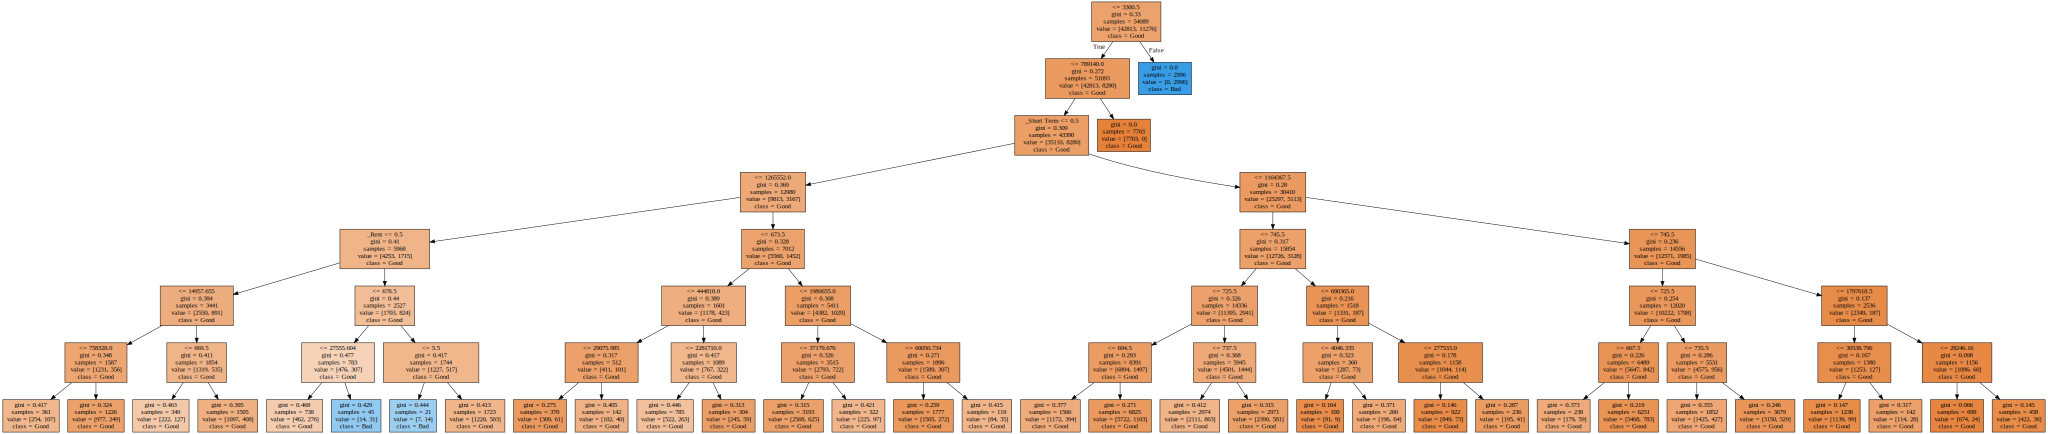

In [26]:
# # 변수명
v_feature_names = df_train_x.columns
# 트리 모델을 tree_depth4.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)

export_graphviz(tree_final, out_file="tree_depth4.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_depth4.dot",encoding="uTf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 중요도 평가

In [23]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance = df_importance[:20]
df_importance.round(3)

,Feature,Importance
1,신용점수,0.843
0,현재 대출 총액,0.098
2,연소득,0.025
13,기간_Short Term,0.021
3,월별 부채,0.008
28,거주지 소유 여부_Rent,0.003
5,마지막 연체 이후 개월 수,0.001
8,현재 신용 잔고,0.001
35,대출 목적_Medical Bills,0.000
29,대출 목적_Business Loan,0.000


Text(0, 0.5, '설명변수')

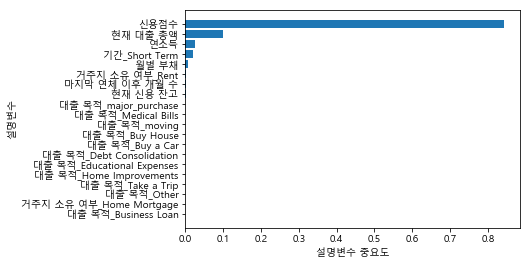

In [24]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 의사결정나무 분석결과
1. 고객의 대출상태에 영향을 주는것은 신용점수, 현재 대출 총액, 연소득 순이다.
2. 신용점수가 3300.5 이상인 고객은 모두 신용불량 판정난(갚을 능력이 없는 상태)인원들이다.

In [25]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Train Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Train Accuracy: 0.847

Test Accuracy: 0.843

Confusion matrix: 
[[18234    10]
 [ 3630  1308]]


#### https://nonmeyet.tistory.com/entry/Confusion-matrix%EC%99%80-Precision-Recall-F1score%EC%9D%98-%EC%9D%B4%ED%95%B4  
결과 해석은 링크 참고

#### 최적화 툴 estimator 사용

In [32]:
# estimator = DecisionTreeClassifier()
# # 구하고자 하는 parameter와 범위
# param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
#               "min_samples_leaf": para_leaf}
# # 정확도가 높은 최적 parameter 찾기
# grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
# grid_dt.fit(df_train_x, df_train_y)

# print("best estimator model: \n{}".format(grid_dt.best_estimator_))
# print("\nbest parameter: \n{}".format(grid_dt.best_params_))
# print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

In [7]:
df = pd.DataFrame(data=np.array([[1, 2, 3]]), columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
